# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [19]:
# Your code here.
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
import seaborn as sns
import plotly.express as px


In [24]:
student_data = pd.DataFrame({'age': [17,51,27,21,36,48,19,26,54,30], 'tardies': [10,1,5,9,4,2,9,6,0,3]})

In [25]:
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [27]:
# Your code here.
px.scatter(student_data,x = 'age',y = 'tardies')


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
'''
There is a trend.  As age increases, the number of tardies decreases.
'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [32]:
# Your response here.
print (student_data['age'].corr(student_data['tardies']))
print (pd.DataFrame.cov(student_data))
'''
The covriance number is negative, so the variables have a negative correlation, as one goes
up the other goes down.
However, the coorelation tells us the same thing, as well as, the strength of the relationship
in this case a Strong negative correlation.'''

-0.9391626886887122
                age    tardies
age      187.655556 -45.566667
tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

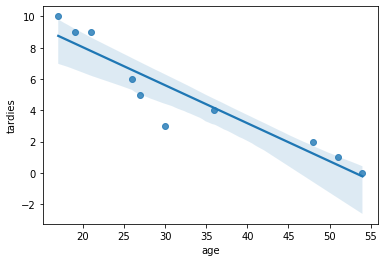

In [33]:
# Your response here.
sns.regplot(x='age',y = 'tardies',data = student_data)
'''I am looking for a line going down with points pretty close to the line.'''

Plot your regression model on your scatter plot.

In [ ]:
# Your code here.
'''see above'''

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
'''I would say that there is a correlation between age and tardies, however,
our sample size is small.  I would like to see more information about other 
samples.  This was at a coding bootcamp, would the correlation hold for other types of students?'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [80]:
# Import any libraries you may need & the data
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

cars = pd.read_csv('/Users/erinberardi/Desktop/GitHub/dataV2-labs/module-2/Regression-Analysis/vehicles.csv')
cars.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [74]:
# Your response here. 
cars.corr()

print(cars['CO2 Emission Grams/Mile'].corr(cars['Year']))
print(cars['CO2 Emission Grams/Mile'].corr(cars['Cylinders']))
print(cars['CO2 Emission Grams/Mile'].corr(cars['Fuel Barrels/Year']))
print(cars['CO2 Emission Grams/Mile'].corr(cars['Combined MPG']))
print(cars['CO2 Emission Grams/Mile'].corr(cars['Fuel Cost/Year']))

'''
I think year and cylinders will be the least helpful. They have the smallest correlation
coefficients.
And Fuel barrels/year will be the most helpful.'''

-0.22229960295054238
0.7523925537297486
0.9861886621428727
-0.9262290389336444
0.9308651512201843


'\nI think year and cylinders will be the least helpful. They have the smallest correlation\ncoefficients.\nAnd Fuel barrels/year will be the most helpful.'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [98]:
X = cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].values
y = cars['CO2 Emission Grams/Mile'].values

In [102]:
regressor = LinearRegression()  
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
regressor.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [108]:
y_pred = regressor.predict(X)

In [117]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df.head()


,Actual,Predicted
0,522.764706,522.030384
1,683.615385,671.001053
2,555.437500,552.684951
3,683.615385,670.680436
4,555.437500,570.340582


In [ ]:
'''I don't know how to get the predicted attribute for the label 'CO2 Emissions'''

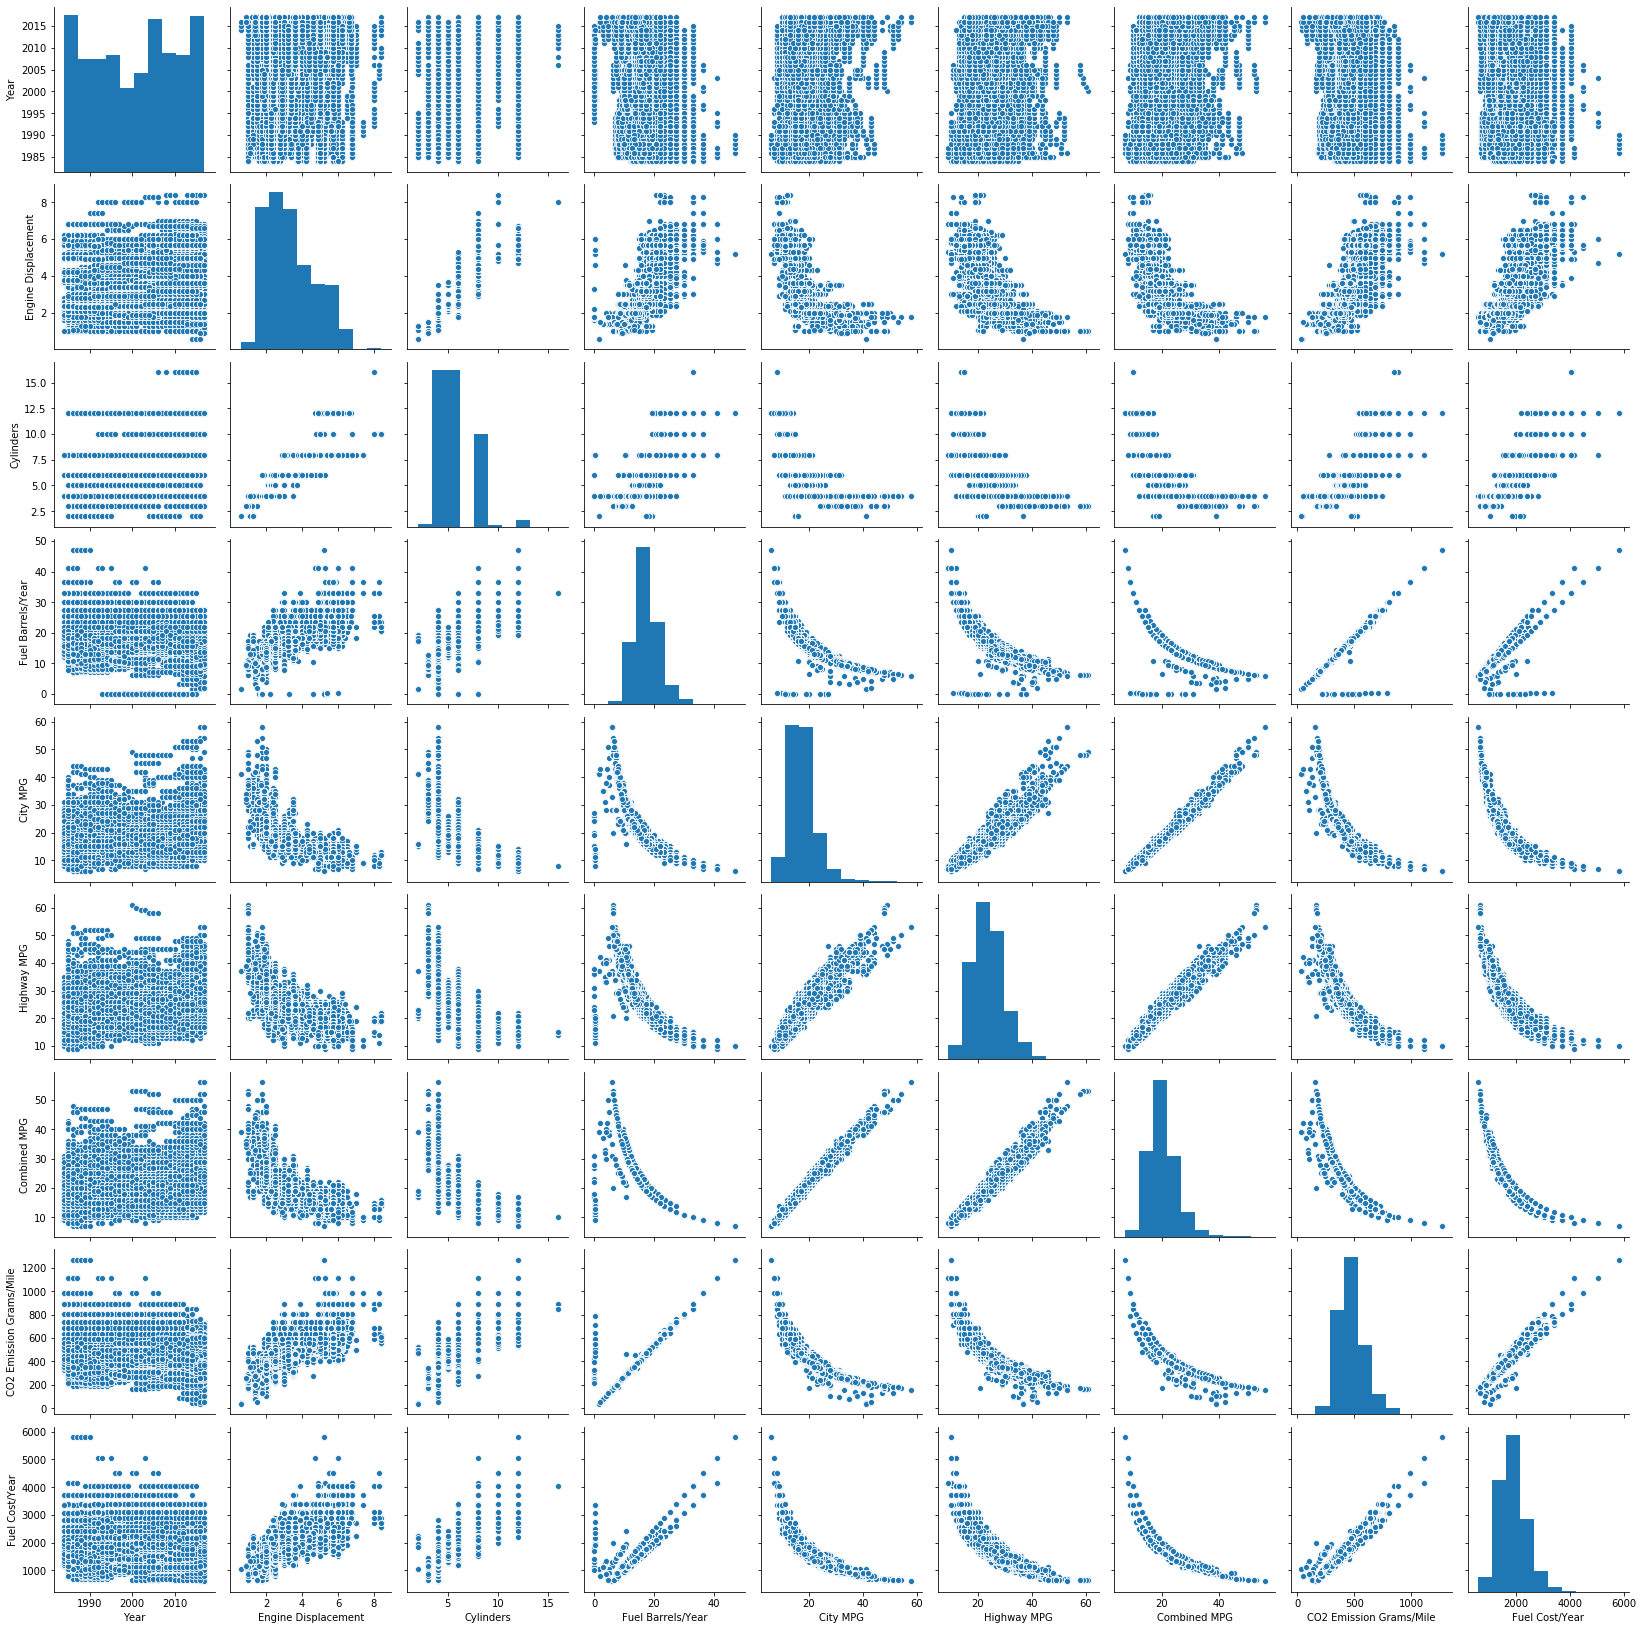

In [97]:
sns.pairplot(cars)

In [ ]:
'''Trying to figure out how to do model for all of the attributes.  I took the one I
thought would have the best prediction rate.'''

In [75]:
model = LinearRegression()

In [76]:
# Your response here. 
model.fit((cars['CO2 Emission Grams/Mile']).values.reshape(-1,1),(cars['Fuel Barrels/Year']).values.reshape(-1,1))
intercept = model.intercept_
slope = model.coef_
print (intercept[0])
print (slope[0][0])


0.02101385249711285
0.037002813068274173


In [90]:
prediction = [intercept + slope*x for x in cars['Fuel Barrels/Year']]

In [91]:
residuals = [cars['Fuel Barrels/Year'][i] - prediction[i] for i in range(len('Fuel Barrels/Year'))]

In [92]:
residuals = [x-y for x,y in zip(cars['Fuel Barrels/Year'],prediction)]

In [93]:
RMSE = np.sqrt((np.mean([residual**2 for residual in residuals])))

In [96]:
perc_error = (RMSE/cars['CO2 Emission Grams/Mile'].mean())*100
perc_error

3.676345252552155

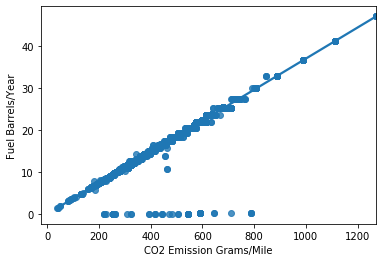

In [95]:
sns.regplot(x='CO2 Emission Grams/Mile',y = 'Fuel Barrels/Year',data = cars)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [149]:
# Your code here. 
party = pd.DataFrame({'Inv':[1,3,4,6,8,9,11,14], 'Att':[1,2,4,4,5,7,8,13]})
party['Not Att'] = party['Inv']-party['Att']
party

,Inv,Att,Not Att
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [146]:
# Your code here.
px.scatter(party,x = 'Inv',y = 'Att')


x=party['Inv']
y=party['Att']
np.polyfit(x,y,1)


stats.linregress(x,y)
m = slope
b=intercept

#plt.plot(x,m*x +b)

'''Call numpy.polyfit(x, y, deg) with x and y as arrays of data for the scatter plot
and deg as 1 to calculate the slope and y-intercept of the line of best fit.
Plot the linear regression line by calling matplotlib.pyplot.plot(x, eq) with x as
the array of x-values and eq as the y-intercept added to the product of the slope and x.
'''

'''
I can get the scatter plot but I cannot get the regression line to work.
'''




'\nI can get the scatter plot but I cannot get the regression line to work.\n'

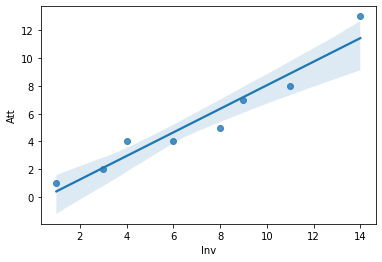

In [147]:
sns.regplot(x = 'Inv',y = 'Att',data = party)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

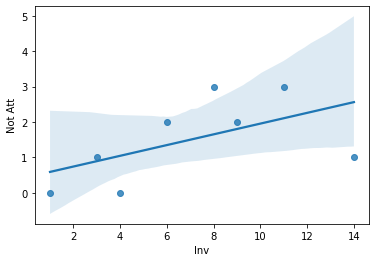

In [151]:
# Your response here. 
'''
This will not answer her question.  The relationship is that the more people she invited,
the higher the attendance number.  Which makes logical sense.  She needs to compare Invited to 
Not Attended.'''

px.scatter(party,x = 'Inv',y = 'Not Att')
sns.regplot(x = 'Inv',y = 'Not Att',data = party)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [157]:
# Your response here. 
q_low = party["Not Att"].quantile(.75)
q_hi  =party["Not Att"].quantile(.25)

party_iqr = party[(party["Not Att"] < q_hi) & (party["Not Att"] > q_low)]
party_iqr

print(party['Inv'].corr(party['Att']))
print(party['Inv'].corr(party['Not Att']))

0.9652303546573691
0.5504818825631803


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
'''
There does not seem to be a strong correlation between invited and not attended.
Again due to the invitation of more guests, the more likely you will have more
Not attend.'''